# Spectral clustering algorithm for community detection in Gaussian mixture model

In [5]:
import numpy as np
import scipy.linalg as la
import scipy as sp
import math
from random import *
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

## Some useful linear algebra tools

In [12]:
A = [[1,2,3],[1,1,1],[3,2,1]] # this is a two-dimensional list
A = np.array(A) # this is a matrix (array)

At = A.T  # transpose of A

eigenval, eigenvec = la.eig(A) # eigenvectors and eigenvalues of A

B = np.matmul(A,At)  # Matrix product of A and its transpose
C = A@At             # shorthand for the same 

# the first eigenvector is the 0th column of the eigenvec matrix
# we take the first row of the transpose
e1, e2, e3 = eigenvec.T[0], eigenvec.T[1], eigenvec.T[2]

print(e1)
print(A@e1)

#scalar product of two vectors

print(np.dot(e1,e2))

print(B)
print(C)

print(A)


[0.66666667 0.33333333 0.66666667]
[3.33333333 1.66666667 3.33333333]
2.220446049250313e-16
[[14  6 10]
 [ 6  3  6]
 [10  6 14]]
[[14  6 10]
 [ 6  3  6]
 [10  6 14]]
[[1 2 3]
 [1 1 1]
 [3 2 1]]


## Generate the Gaussian mixture model

In [8]:
def gaussian_mixture(n, m, mu):
    '''
    Simulate the Gaussian mixture model
    
    Inputs: dimension n, sample size m and a vector mu of dimension n
    
    Outputs a pair (gmm, theta) consisting of a matrix gmm with m columns
    and n rows representing the Gaussian mixture model and a matrix theta
    representing the actual community structure.
    '''    
    
    res = []
    g = []
    theta = []
    if len(mu) != n:
        print("ERROR dimension n and dimension of mu must be the same")
        return()
    for i in range(m):
        g.append(np.random.normal(loc=0.0, scale=1.0, size=n))
        theta.append(1-2*np.random.binomial(1, 1/2, size=n))
    #print(theta)
    for i in range(m):
        h = []
        for j in range(n):
            h.append(g[i][j]+mu[j]*theta[i][j])
        #print(h)
        res.append(h)
    return(np.array(res), np.array(theta))
        
gmm, theta = gaussian_mixture(3,200,[5,0,0])

#print(gmm)


## Define the spectral clustering algorithm

In [9]:
def spectral_clustering(gmm):
    '''
    Implementation of the spectral clustering algorithm
    
    Input: A matrix gmm representing the gaussian mixture model
    Output: A matrix consisting of 1s and -1s representing the 
    partition of the points in gmm into two communities.
    '''
    comm = []
    ...
    return(comm)


## Plotting functions
A basic function to draw the Gaussian mixture model in 3 dimensions. 

**TODO** could be improved by using colors to indicate the association to one of the two communities as determined by the spectral clustering algorithm. Using the true communities as indicated by `theta`, misclassified points can be highlighted.

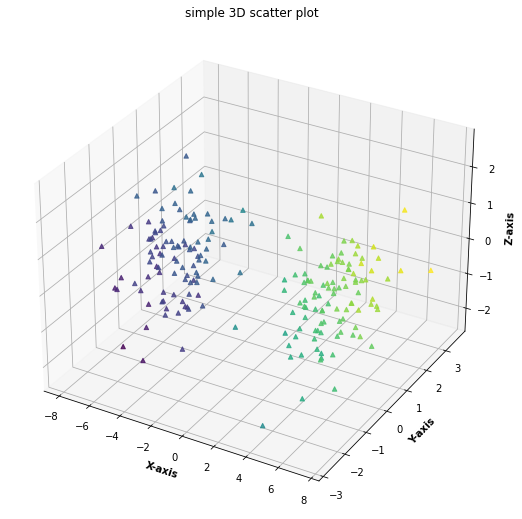

In [11]:
def plot_gmm_3d(gmm, theta=None, comm=None):
    fig = plt.figure(figsize = (16, 9))
    ax = plt.axes(projection ="3d")
    x,y,z = gmm.T[0],gmm.T[1],gmm.T[2]
   
    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
    # Creating color map
    my_cmap = plt.get_cmap('hsv')
 
    # Creating plot
    sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    #cmap = my_cmap,
                    marker ='^')
 
    plt.title("simple 3D scatter plot")
    ax.set_xlabel('X-axis', fontweight ='bold')
    ax.set_ylabel('Y-axis', fontweight ='bold')
    ax.set_zlabel('Z-axis', fontweight ='bold')
    #fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
    # show plot
    plt.show()

if len(gmm.T) == 3:
    plot_gmm_3d(gmm)